<Figure size 600x500 with 0 Axes>

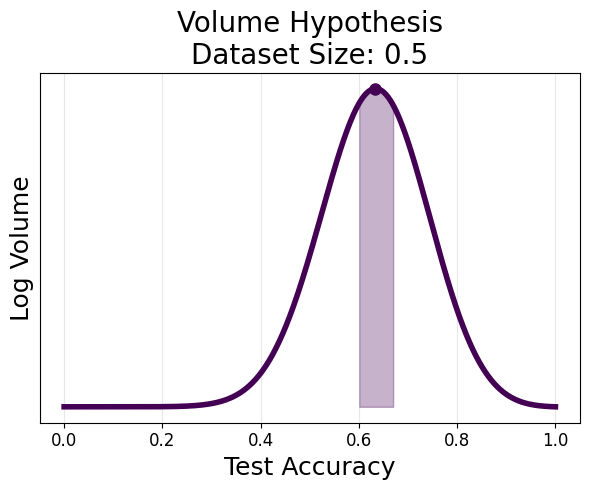

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def emerging_gaussian(x, b, base_width=0.1):
    """
    A Gaussian-like hump that emerges from x=1 at b = 1, and moves to the left with smaller b.
    
    Parameters:
    x: array of x values (0 to 1)
    b: control parameter - as b increases, hump grows and moves right
    emergence_speed: controls how quickly the hump grows from zero
    movement_speed: controls how quickly the hump moves rightward
    base_width: base width of the Gaussian
    """
    # Start with hump centered at x=1 when b=0
    base_center = 0.8
    
    # As b increases:
    # 1. The center moves left from x=1
    center = base_center * (b**0.3)
    
    # 2. The amplitude grows from 0
    amplitude = (1/b)**3
    
    # 3. Optional: width can change too
    width = base_width * (1 + 0.5 * b / (1 + b))
    
    # Gaussian function
    gaussian = -amplitude * np.exp(-0.5 * ((x - center) / width) ** 2) * x * (x - 1)
    
    # Ensure we only get values in [0,1] range
    return gaussian, center, amplitude

# Plot for different b values
plt.figure(figsize=(6, 5))

# Create x values
x = np.linspace(0, 1, 1000)

# Plot for different b values
plt.figure(figsize=(6, 5))

b_values = [0.5]  #, 0.7, 0.9, 1.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(b_values)))

for i, b in enumerate(b_values):
    y, center, amplitude = emerging_gaussian(x, b)
    plt.plot(x, y, color=colors[i], linewidth=4)
    
    # Mark the peak position
    peak_idx = np.argmax(y)
    plt.plot(x[peak_idx], y[peak_idx], 'o', color=colors[i], markersize=8)
    
    # Color a small region around the center
    left_width = 0.05
    right_width = 0.02
    mask = (x >= center - left_width) & (x <= center + right_width)
    
    # Fill the region around the center
    plt.fill_between(x[mask], y[mask], alpha=0.3, color=colors[i], 
                     label=f'Center region (b={b})')

plt.xlabel('Test Accuracy', fontsize=18)
plt.xticks(fontsize = 12)
plt.ylabel('Log Volume', fontsize=18)
plt.title('Volume Hypothesis\nDataset Size: 0.5', fontsize=20)
plt.yticks([])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("Volume_Hypothesis_Test_Acc_Diagram.png")
plt.show()

<Figure size 600x500 with 0 Axes>

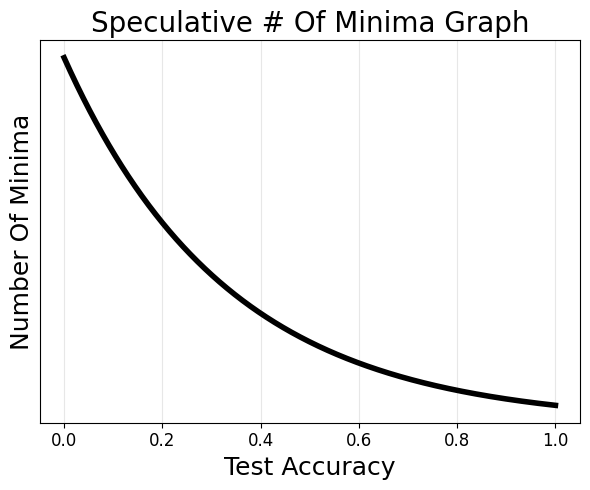

In [2]:
# Plot for different b values
plt.figure(figsize=(6, 5))

# Create x values
x = np.linspace(0, 1, 1000)

# Plot for different b values
plt.figure(figsize=(6, 5))

plt.plot(x, np.exp(-3*x), color='k', linewidth=4)

plt.xlabel('Test Accuracy', fontsize=18)
plt.xticks(fontsize = 12)
plt.ylabel('Number Of Minima', fontsize=18)
plt.title('Speculative # Of Minima Graph', fontsize=20)
plt.yticks([])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("Test_Acc_Minima_Number.png")
plt.show()

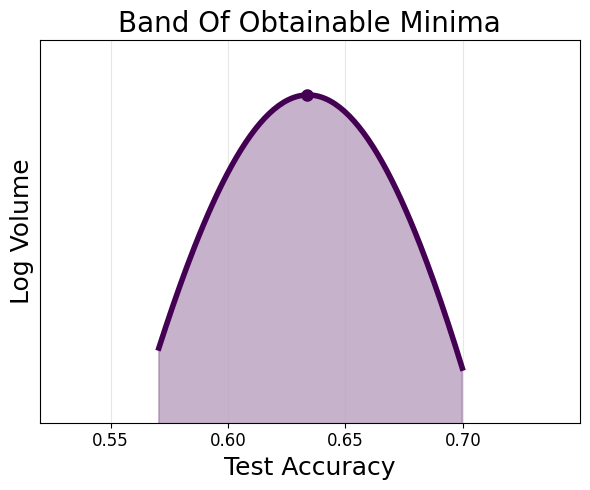

In [3]:
# Just the zoomed-in plot (zoomed out version)
plt.figure(figsize=(6, 5))

b_values = [0.5]
colors = plt.cm.viridis(np.linspace(0, 1, len(b_values)))

for i, b in enumerate(b_values):
    y, center, amplitude = emerging_gaussian(x, b)
    
    # Define the zoom region - INCREASED WIDTHS to zoom out
    left_width = 0.08  # Increased from 0.05
    right_width = 0.05  # Increased from 0.02
    x_min = center - left_width
    x_max = center + right_width
    
    # Create mask for the zoom region
    zoom_mask = (x >= x_min) & (x <= x_max)
    x_zoom = x[zoom_mask]
    y_zoom = y[zoom_mask]
    
    # Plot the zoomed region
    plt.plot(x_zoom, y_zoom, color=colors[i], linewidth=4)
    plt.fill_between(x_zoom, y_zoom, alpha=0.3, color=colors[i])
    
    # Mark the peak
    peak_idx_zoom = np.argmax(y_zoom)
    plt.plot(x_zoom[peak_idx_zoom], y_zoom[peak_idx_zoom], 'o', color=colors[i], markersize=8)
    
    # Set limits
    plt.xlim(x_min - 0.05, x_max + 0.05)
    
    # Add y-axis padding (increased padding for more zoom out effect)
    y_padding = (np.max(y_zoom) - np.min(y_zoom)) * 0.2  # Increased from 0.1
    plt.ylim(np.min(y_zoom) - y_padding, np.max(y_zoom) + y_padding)

plt.xlabel('Test Accuracy', fontsize=18)
plt.xticks(fontsize=12)
plt.ylabel('Log Volume', fontsize=18)
plt.title('Band Of Obtainable Minima', fontsize=20)
plt.yticks([])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("Band Of Obtainable Minima.png")
plt.show()

<Figure size 600x500 with 0 Axes>

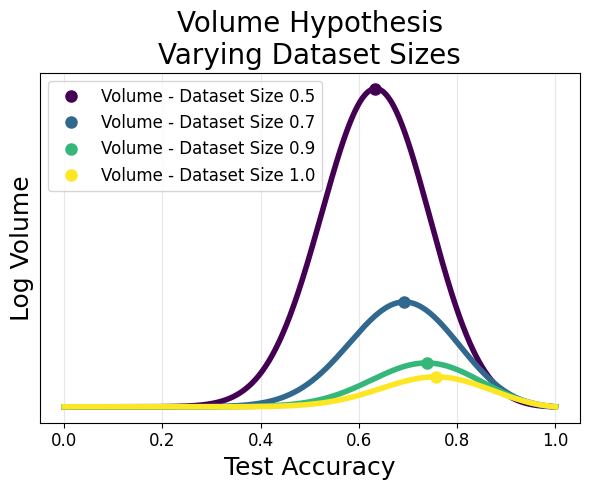

In [4]:
# Plot for different b values
plt.figure(figsize=(6, 5))

# Create x values
x = np.linspace(0, 1, 1000)

# Plot for different b values
plt.figure(figsize=(6, 5))

b_values = [0.5, 0.7, 0.9, 1.0]
colors = plt.cm.viridis(np.linspace(0, 1, len(b_values)))

for i, b in enumerate(b_values):
    y, center, amplitude = emerging_gaussian(x, b)
    plt.plot(x, y, color=colors[i], linewidth=4)
    
    # Mark the peak position
    peak_idx = np.argmax(y)
    plt.plot(x[peak_idx], y[peak_idx], 'o', color=colors[i], markersize=8, label = f"Volume - Dataset Size {b}")
    
    # Color a small region around the center
    left_width = 0.05
    right_width = 0.02
    mask = (x >= center - left_width) & (x <= center + right_width)
    
    # Fill the region around the center
    #plt.fill_between(x[mask], y[mask], alpha=0.3, color=colors[i], 
    #                )#label=f'Center region (b={b})')

plt.xlabel('Test Accuracy', fontsize=18)
plt.xticks(fontsize = 12)
plt.ylabel('Log Volume', fontsize=18)
plt.title('Volume Hypothesis\nVarying Dataset Sizes', fontsize=20)
plt.yticks([])
plt.legend(loc='best', fontsize = 12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("Varying_Datasets.png")
plt.show()